Usando o exemplo 499

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime

%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
#importando dataset

df = pd.read_csv("../Tweets.csv")

In [4]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,3.486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,6.837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0,Bad Flight,7.033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

<Axes: xlabel='airline_sentiment', ylabel='count'>

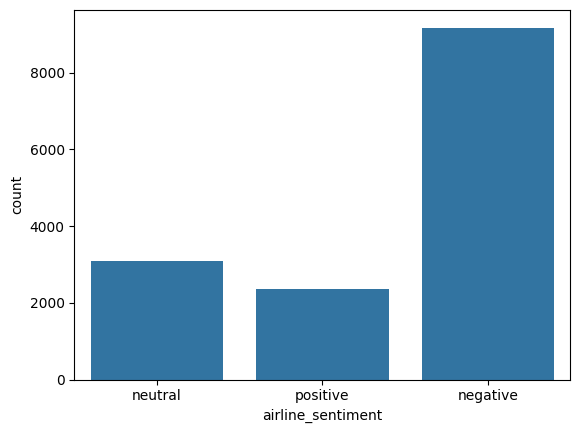

In [6]:
sns.countplot(x="airline_sentiment", data=df) # Quantidade de classes

**Pré-processamento**

In [7]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' resource


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [9]:
df["clean_text"] = df["text"].apply(preprocess_text)

In [10]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,3.486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercial expe...
2,570301083672813571,neutral,6.837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...
3,570301031407624196,negative,1.0,Bad Flight,7.033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing


<Axes: xlabel='airline_sentiment', ylabel='count'>

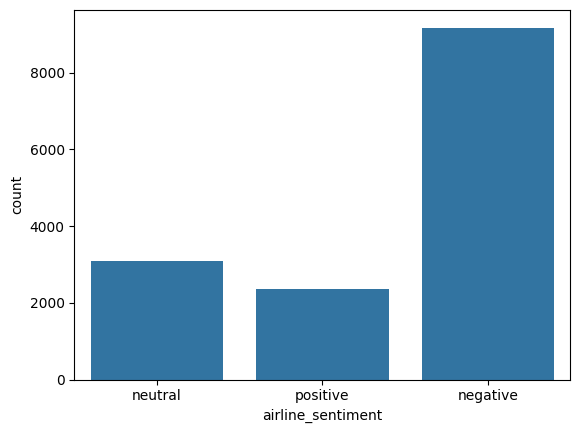

In [11]:
sns.countplot(x="airline_sentiment", data=df) # validando se mudou as classes

**OVERSAMPLING**

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
from imblearn.pipeline import Pipeline as imbpipeline #importa o pipeline do imblearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE

X = df['clean_text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_smote = imbpipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC())
])

pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)

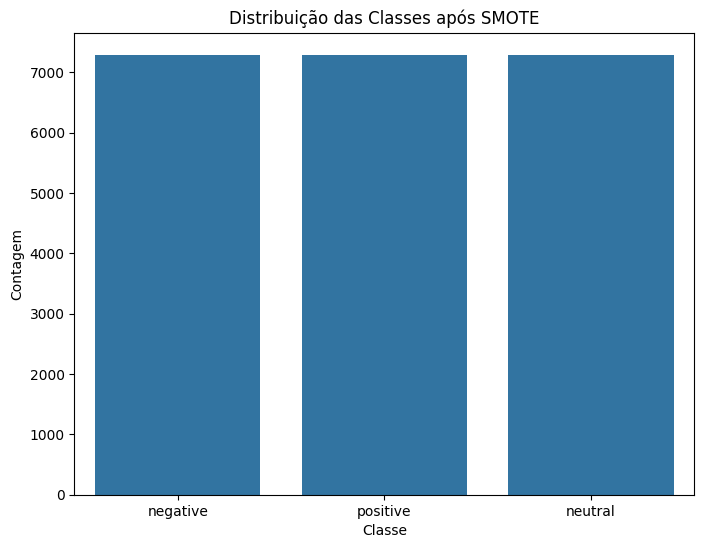

Contagem das classes após SMOTE:
airline_sentiment
negative    7289
positive    7289
neutral     7289
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
# Obter as classes balanceadas após o SMOTE
y_resampled = pipeline_smote.named_steps['smote'].fit_resample(
    pipeline_smote.named_steps['vect'].fit_transform(X_train), y_train
)[1]

# Contar a distribuição das classes
class_distribution = pd.Series(y_resampled).value_counts()

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes após SMOTE')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Imprimir a contagem das classes
print('Contagem das classes após SMOTE:')
print(class_distribution)

**LIME**

In [15]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['clean_text']
y = df['airline_sentiment']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer


def predict_proba(texts):
    # LIME espera probabilidades, mas LinearSVC não tem predict_proba.
    # Usamos decision_function e normalizamos para somar 1 (softmax-like).
    scores = pipeline_smote.decision_function(texts)
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline_smote.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline_smote.classes_))

explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 499
Original text:
americanair narrowly made standbylots snag trip
Real class: negative
Classe predita: negative


In [18]:
# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
americanair: 0.0853
made: -0.0844
snag: -0.0549
trip: -0.0538
standbylots: -0.0141
narrowly: -0.0131


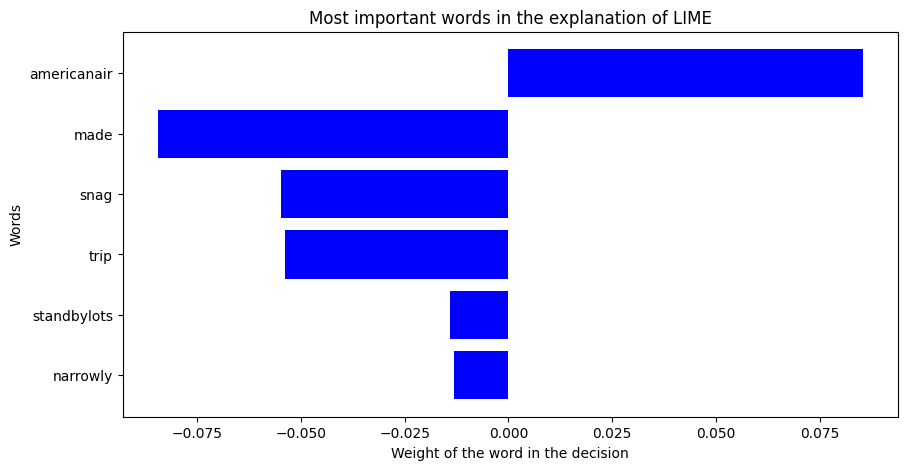

In [19]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [20]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Word", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Word,Impact
0,americanair,0.085269
5,narrowly,-0.013079
4,standbylots,-0.014103
3,trip,-0.053808
2,snag,-0.054881
1,made,-0.084386


<Figure size 1000x600 with 0 Axes>

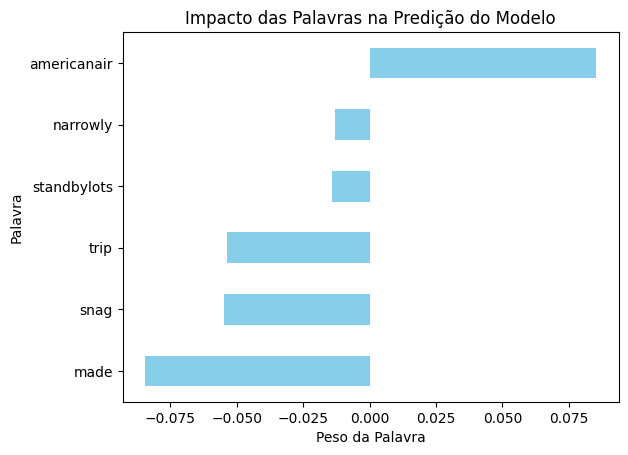

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
lime_df.plot(kind="barh", x="Word", y="Impact", color="skyblue", legend=False)
plt.xlabel("Peso da Palavra")
plt.ylabel("Palavra")
plt.title("Impacto das Palavras na Predição do Modelo")
plt.gca().invert_yaxis()  # Inverte o eixo para as palavras mais importantes ficarem no topo
plt.show()

In [22]:
y_pred = pipeline_smote.predict(X_test)

**Métricas**

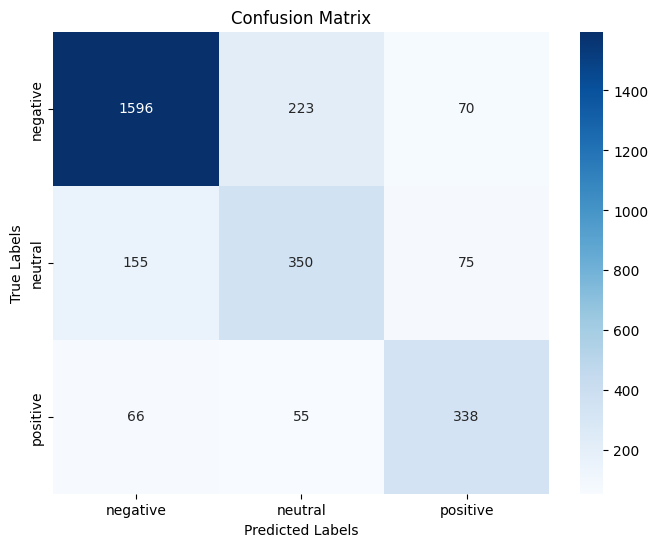

In [23]:
# prompt: matriz de confusão

import matplotlib.pyplot as plt
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline_smote.classes_, yticklabels=pipeline_smote.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acurácia: 0.7801
Precisão: 0.7868
Recall: 0.7801
F1-Score: 0.7830


**Attention Vizualization**

In [25]:
#verificando a ordem das classes
print(pipeline_smote.classes_)

['negative' 'neutral' 'positive']


Palavras do exemplo e seus pesos na decisão da classe prevista:
           Feature    Weight
7238      narrowly  0.629294
9930   standbylots  0.629294
9717          snag  0.166017
6685          made -0.129669
10764         trip -0.202629
370    americanair -1.802622


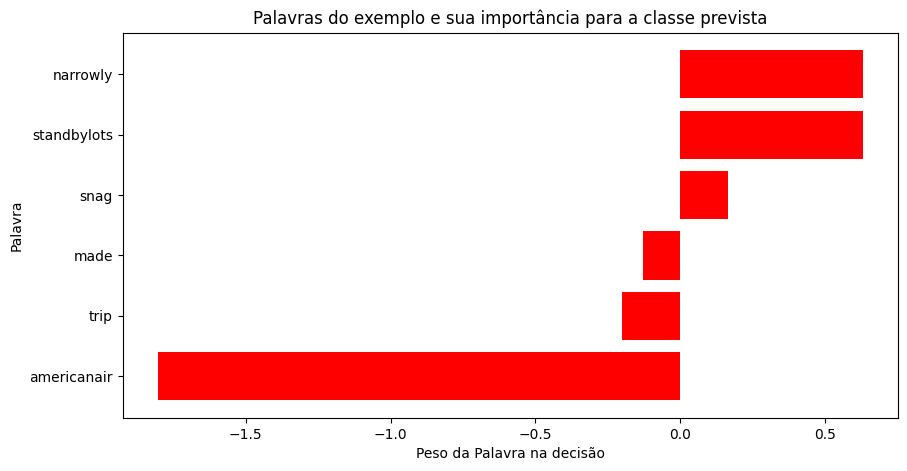

In [26]:
# Use o mesmo sample_text do LIME
feature_names = pipeline_smote.named_steps['vect'].get_feature_names_out()

classe_prevista = pipeline_smote.predict([sample_text])[0]
classe_idx = list(pipeline_smote.classes_).index(classe_prevista)
pesos = pipeline_smote.named_steps['clf'].coef_[classe_idx]

importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})
palavras_exemplo = set(sample_text.split())
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Assumindo que 'pipeline' é o pipeline do SVM
pesos = pipeline_smote.named_steps['clf'].coef_[0]  # Obter os pesos do SVM

# Obter os nomes das features
nomes_das_features = pipeline_smote.named_steps['vect'].get_feature_names_out()

# Criar um DataFrame para visualizar os pesos
importancias_das_features = pd.DataFrame({'Feature': nomes_das_features, 'Weight': pesos})
importancias_das_features = importancias_das_features.sort_values(by='Weight', ascending=False)

print(importancias_das_features.head(20))  # Exibir as 20 features mais importantes

            Feature    Weight
11621         worst  3.171554
4529           hour  2.922822
3511            fix  2.805240
2634   disappointed  2.791341
2422        delayed  2.512468
7857           paid  2.366016
3330           fail  2.343760
4555             hr  2.316641
4504       horrible  2.293936
9014     ridiculous  2.235181
6581           lost  2.206099
10485         third  2.193706
11001        unless  2.154303
9127           rude  2.109880
4215           half  2.104766
10106          suck  2.059073
3134          error  2.052219
9658       sleeping  2.034965
512         apology  1.990384
9411      seriously  1.989649


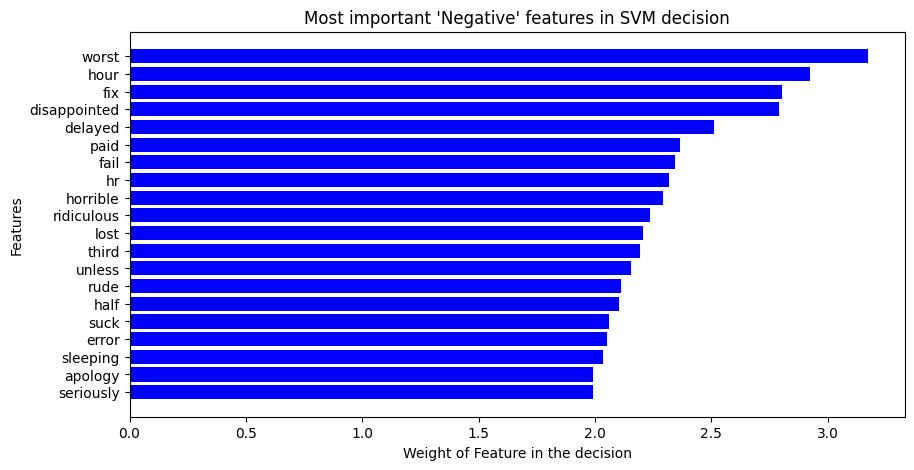

In [28]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Negative' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

In [29]:
# Assumindo que 'pipeline' é o pipeline do SVM
pesos = pipeline_smote.named_steps['clf'].coef_[1]  # Obter os pesos do SVM

# Obter os nomes das features
nomes_das_features = pipeline_smote.named_steps['vect'].get_feature_names_out()

# Criar um DataFrame para visualizar os pesos
importancias_das_features = pd.DataFrame({'Feature': nomes_das_features, 'Weight': pesos})
importancias_das_features = importancias_das_features.sort_values(by='Weight', ascending=False)

print(importancias_das_features.head(20))  # Exibir as 20 features mais importantes

                              Feature    Weight
9251                              saw  2.455200
7988                          penalty  2.380251
10202                         swamped  2.311157
5970                    jayfranceschi  2.254734
5240                  httptcoseulpvfn  2.150864
4045                             golf  2.132621
10421                           thatd  2.106439
2828                           dragon  2.091189
8664                          recheck  2.071754
495                           anytime  2.066870
8383                      problemjust  1.987209
10974                          united  1.958816
2280                              dal  1.948808
2642   disastertravelingwithsmallkids  1.925233
11529                          winner  1.879382
66                       accidentally  1.870648
2470                           denbna  1.865576
528                             apple  1.854991
1352                        cabcelled  1.845352
8591                       ratepolicy  1

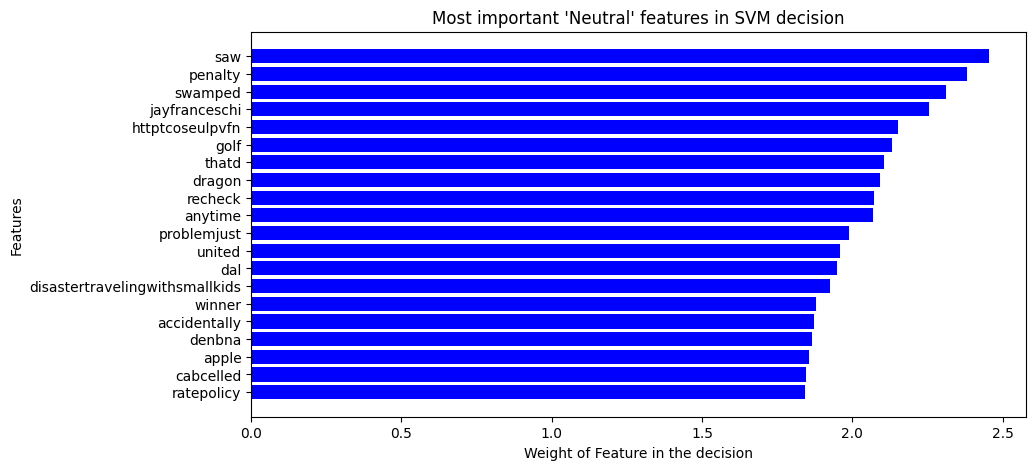

In [30]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Neutral' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

In [31]:
# Assumindo que 'pipeline' é o pipeline do SVM
pesos = pipeline_smote.named_steps['clf'].coef_[2]  # Obter os pesos do SVM

# Obter os nomes das features
nomes_das_features = pipeline_smote.named_steps['vect'].get_feature_names_out()

# Criar um DataFrame para visualizar os pesos
import pandas as pd
importancias_das_features = pd.DataFrame({'Feature': nomes_das_features, 'Weight': pesos})
importancias_das_features = importancias_das_features.sort_values(by='Weight', ascending=False)

print(importancias_das_features.head(20))  # Exibir as 20 features mais importantes

                Feature    Weight
755             awesome  3.686784
4110              great  3.448115
359             amazing  3.253363
485             anybody  3.104532
3222          excellent  2.990930
961                best  2.934729
3226        exceptional  2.884623
6230              kudos  2.793306
4611    httptcoaiycwvoq  2.499913
10407            thanks  2.473964
6599               love  2.428828
539          appreciate  2.371758
5000   httptcololghpcdu  2.365527
11579         wonderful  2.318365
10215             sweet  2.271750
10400             thank  2.267810
6613             loving  2.241801
3514             fixing  2.235370
5997             jetbae  2.204975
4616    httptcoanvbjipx  2.191030


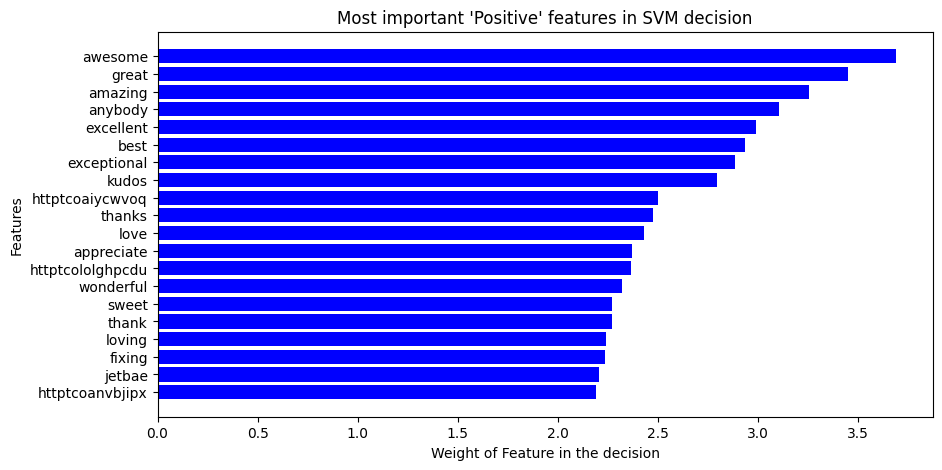

In [32]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Positive' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

In [33]:
# Contar a distribuição das classes pós balanceamento em tabela
class_distribution = pd.Series(y_resampled).value_counts()
class_distribution2 = pd.Series(y_test).value_counts()
# Exibir a distribuição das classes
print("Distribuição das classes após balanceamento:")
print(class_distribution)

print("Distribuição das classes de teste:")
print(class_distribution2)

Distribuição das classes após balanceamento:
airline_sentiment
negative    7289
positive    7289
neutral     7289
Name: count, dtype: int64
Distribuição das classes de teste:
airline_sentiment
negative    1889
neutral      580
positive     459
Name: count, dtype: int64
